Kodların Temiz Çalışması ve gereksi uyarıların engellenmesini sağlamak amaçlı eklendi.

In [1]:
import warnings; 
warnings.simplefilter('ignore')

Pandas kütüphanesi import edildi

In [2]:
import pandas as pd
from prophet import Prophet

Data dosyamızın sistem tarafından okunması sağlandı.

In [6]:
df = pd.read_csv('data_k.csv')
df.head()
print(df.shape)
print(df.head())

(124, 2)
       gun    value
0  2000-03  3634516
1  2000-05  3388016
2  2000-07  3683338
3  2000-09  4464631
4  2000-11  3637225


Verinin Gorsellestirilmesi
Bir zaman serisini çizmek, aslında bir trend, mevsimsel bir döngü, aykırı değerler ve daha fazlası olup olmadığını görmemize yardımcı olur. Bize veriler için bir fikir verir.

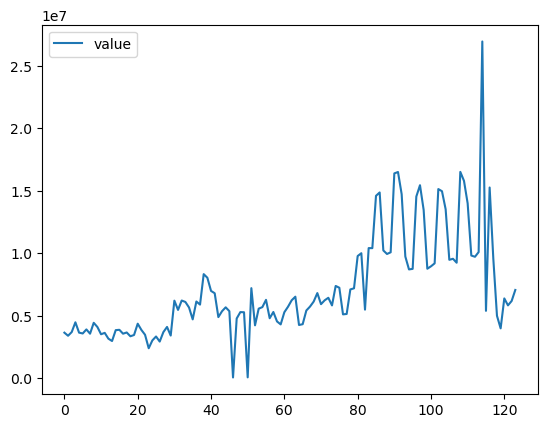

In [7]:
from matplotlib import pyplot

df.plot()
pyplot.show()

Veri Tipi Donusumu
DataFrame belirli biçimi olmalıdır. İlk sütun ds adına sahip olmalı ve tarih-saatleri içermelidir. İkinci sütun y adına sahip olmalı ve gözlemleri içermelidir.

In [8]:
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [19]:
df.head()

,ds,y
0,2000-03-01,3634516
1,2000-05-01,3388016
2,2000-07-01,3683338
3,2000-09-01,4464631
4,2000-11-01,3637225


Bu aşamada veri tipi dönüşümü sağlandı.DataFrame belirli biçimi olmalıdır. İlk sütun ds adına sahip olmalı ve tarih-saatleri içermelidir. İkinci sütun y adına sahip olmalı ve gözlemleri içermelidir.

Modelin Olusturulmasi
Prophet'i tahmin için kullanmak için, önce bir Prophet() nesnesi tanımlanır ve yapılandırılır, ardından fit() işlevi çağrılarak ve veriler geçirilerek veri kümesine sığdırılır.

Model hemen hemen her şeyi otomatik olarak çözmek için çalışacaktır.

In [20]:
model = Prophet()
model.fit(df)

06:46:36 - cmdstanpy - INFO - Chain [1] start processing
06:46:36 - cmdstanpy - INFO - Chain [1] done processing


Datalar sisteme uygun hale getirildi.

Oluşturduğumuz df tablosu çağırıldı.

In [17]:
df.head()

,ds,y
0,2000-03-01,3634516
1,2000-05-01,3388016
2,2000-07-01,3683338
3,2000-09-01,4464631
4,2000-11-01,3637225


Ornek Ici Tahmin Yapmak
Geçmiş veriler üzerinden bir tahmin yapmak faydalı olabilir.

Yani, modeli eğitmek için girdi olarak kullanılan veriler üzerinde bir tahmin yapabiliriz. İdeal olarak, model verileri daha önce görmüştür ve mükemmel bir tahminde bulunur.

Buna örnek içi (eğitim kümesi örneğinde) tahmin yapmak denir ve sonuçların gözden geçirilmesi modelin ne kadar iyi olduğuna dair fikir verebilir. Yani eğitim verilerini ne kadar iyi öğrendiğidir.

predict() işlevi çağrılarak ve tahmin edilecek tüm aralıklar için 'ds' adlı bir sütun ve tarih-saat içeren satırlar içeren bir DataFrame geçirilerek bir tahmin yapılır.

Bu "tahmin" DataFrame'i yaratmanın birçok yolu vardır. Bu durumda, bir yıllık tarihler arasında döngü yapacağız, ör. veri kümesindeki son 12 ay ve her ay için bir dize oluşturun. Daha sonra tarih listesini bir DataFrame'e dönüştüreceğiz ve dize değerlerini tarih-saat nesnelerine dönüştüreceğiz.

In [21]:
future = list()

for i in range(1, 13):
    date = '2000-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)

predict() işlevinin sonucu, birçok sütun içeren bir DataFrame'dir.

En önemli sütunlar:

tahmin tarih saat ('ds')
tahmin değeri ('yhat')
tahmin edilen değerin üzerinde alt ve üst sınırları ('yhat_lower' ve 'yhat_upper')
Örneğin, ilk birkaç tahmini şu şekilde yazdırabiliriz:

In [22]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 2000-01-01  2.084266e+06 -1.466011e+06  5.459620e+06
1 2000-02-01  3.870008e+06 -6.041655e+04  7.367329e+06
2 2000-03-01  1.254480e+06 -2.383094e+06  4.929204e+06
3 2000-04-01  3.516638e+06 -5.206528e+04  7.212089e+06
4 2000-05-01  1.637849e+06 -2.318153e+06  5.332275e+06


Tahminlerin Cizdirilmesi
Bu, modelde plot() işlevi çağrılarak ve bir sonuç DataFrame'e aktarilarak elde edilebilir.

Asagidaki kod eğitim veri kümesinin bir grafiğini oluşturacak ve tahmin, tahmin tarihleri için üst ve alt sınırlarli gosterecektir.

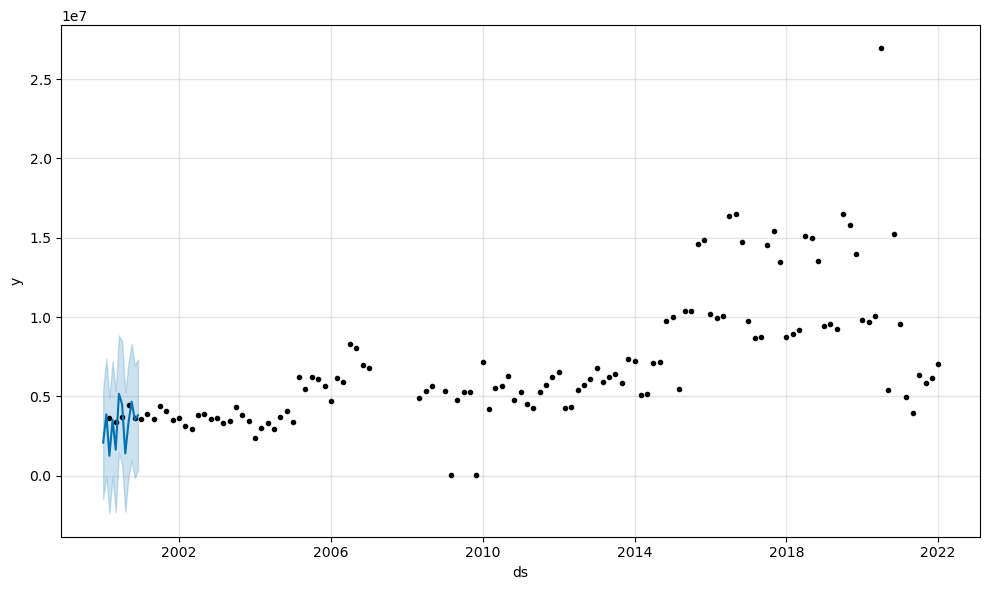

In [23]:
model.plot(forecast)
pyplot.show()

Ornek Disi Tahmin Yapmak
Pratikte, eğitim verilerinin ötesinde bir tahmin yapmak için bir tahmin modeli isteriz.

Buna örnek dışı tahmin denir.

Bunu bir örnek içi tahminle aynı şekilde başarabilir ve basitçe farklı bir tahmin dönemi belirleyebiliriz.

Bu durumda, 2000-01'den başlayarak eğitim veri kümesinin sonunun ötesinde bir dönem tahmin etmeyi deneyelim.

          ds          yhat    yhat_lower    yhat_upper
0 2000-01-01  2.097271e+06 -3.611229e+05  4.745639e+06
1 2000-02-01  4.029757e+06  1.406609e+06  6.651462e+06
2 2000-03-01  1.304391e+06 -1.154496e+06  3.897991e+06
3 2000-04-01  3.944233e+06  1.417244e+06  6.724912e+06
4 2000-05-01  1.835464e+06 -9.451141e+05  4.334856e+06


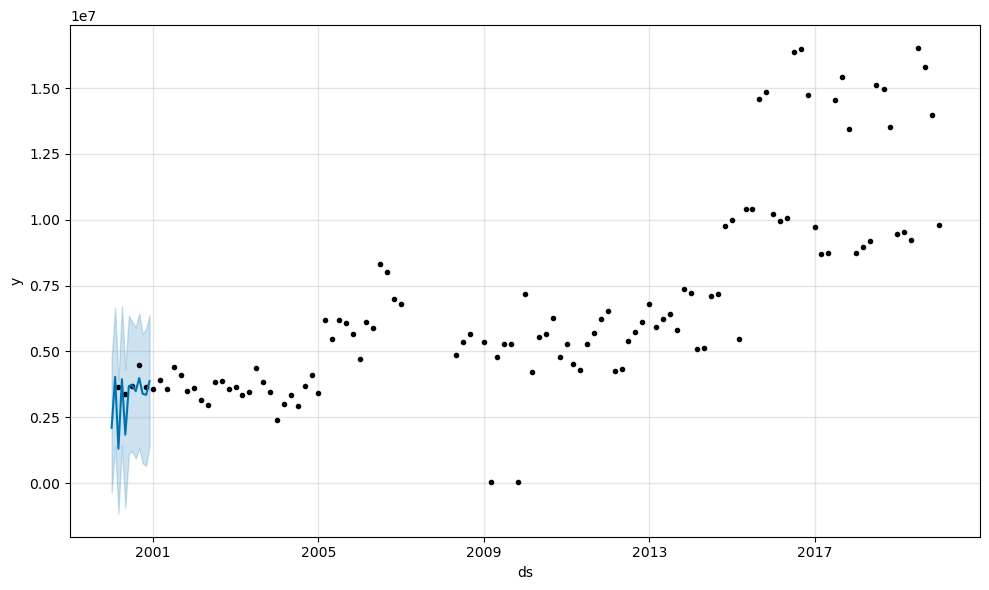

In [38]:
future = list()

for i in range(1, 13):
    date = '2000-%01d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

model.plot(forecast)
pyplot.show()

Modeli Manuel Degerlendirmek
Bir tahmin modelinin performansının objektif bir tahminini geliştirmek çok önemlidir.

Bu, son 12 ay gibi bazı verileri modelden uzak tutarak başarılabilir. Ardından, modelin verilerin ilk kısmına uydurulması, tutulan paket kısmı üzerinde tahminler yapmak için kullanılması ve tahminlerdeki ortalama mutlak hata gibi bir hata ölçüsünün hesaplanması. Örneğin, simüle edilmiş bir örneklem dışı tahmin.

Skor, örneklem dışı bir tahmin yaparken modelin ortalama olarak ne kadar iyi performans göstermesini bekleyebileceğimize dair bir tahmin verir.

Bunu , son 12 ayı kaldırılmış eğitim için yeni bir DataFrame oluşturarak örnek verilerle yapabiliriz .

In [30]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

df = pd.read_csv('data_k.csv')

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [31]:
train = df.drop(df.index[-12:])
print(train.tail())

            ds         y
107 2019-05-01   9232593
108 2019-07-01  16503459
109 2019-09-01  15787340
110 2019-11-01  13986230
111 2020-01-01   9807631


In [33]:
model = Prophet()
model.fit(train)

future = list()
for i in range(1, 13):
    date = '2000-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

print('\n Maalesef verbose false yapamiyoruz :/ \n')
forecast = model.predict(future)

06:53:01 - cmdstanpy - INFO - Chain [1] start processing
06:53:01 - cmdstanpy - INFO - Chain [1] done processing



 Maalesef verbose false yapamiyoruz :/ 



In [41]:
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values

In [42]:
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 6051790.460


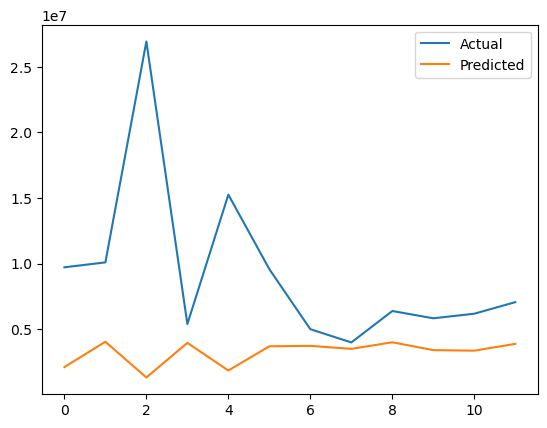

In [43]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()